In [1]:
#### Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#### loading dataSet as pandas dataFrame
data=pd.read_excel('./Data/PURCHASE.xlsx')\

#### Let’s take a look at the top five rows using the DataFrame’s head() method
data.head()

,HOLIDAY,DISCOUNT,FD,PURCHASE
0,NO,YES,YES,YES
1,NO,YES,YES,YES
2,NO,NO,NO,NO
3,YES,YES,YES,YES
4,YES,YES,YES,YES


In [3]:
#### Converting Categorical column to numeric
#### Instead of using OneHot encoder or Label encoder simply use replace method
data.replace({'NO':0, 'YES':1}, inplace=True)
data.head()

,HOLIDAY,DISCOUNT,FD,PURCHASE
0,0,1,1,1
1,0,1,1,1
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1


In [4]:
#### Creating dependent and independent variables
# independent variables
x=data.drop(['PURCHASE'],axis=1)

# dependent variable
y=data['PURCHASE']

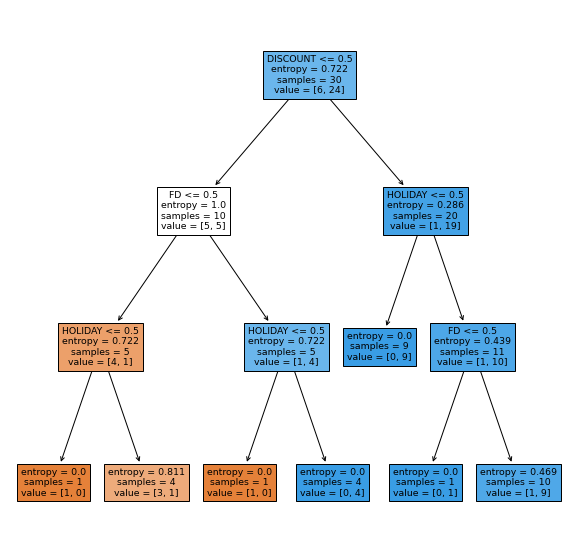

In [5]:
#### Decision Tree Classifier Model instantiate and fit
import sklearn.tree as tree
model_DTC=tree.DecisionTreeClassifier(criterion='entropy')
model_DTC.fit(x,y)

#### Ploting Decision Tree
from sklearn.tree import plot_tree, export_text
features  = x.columns
plt.figure(figsize=(10,10))
plot_tree(model_DTC, feature_names=features,filled = True)
plt.show()

In [6]:
#### Defining function for Classification Results
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def classification_results(model, xR, yR, ON):
    #### Predicting train
    yR_predict = model.predict(xR)

    #### Calculating accuracy score for train
    acc = accuracy_score(yR, yR_predict)
    print('\033[1m' + ON + ':' +'\033[0m')
    print(f'Accuracy : {acc}')
    print('-'*55)

    #### Classification report for train
    CR = classification_report(yR, yR_predict)
    print("classification report : \n", CR)
    print('-'*55)

    #### Confusion matrix for train
    CM = confusion_matrix(yR, yR_predict)
    print("Confusion matrix :\n", CM)
    sns.heatmap(CM, center = True, annot = True, fmt = 'g')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return(yR_predict, acc)

TRAIN:
Accuracy : 0.9333333333333333
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.96      0.96      0.96        24

    accuracy                           0.93        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.93      0.93      0.93        30

-------------------------------------------------------
Confusion matrix :
 [[ 5  1]
 [ 1 23]]


<IPython.core.display.Javascript object>

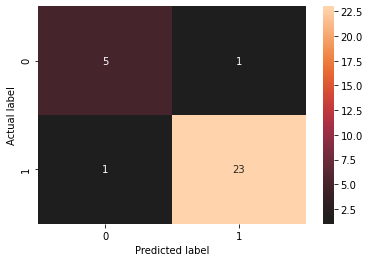

In [7]:
#### Classification Results on train
y_train_predict_dtc, acc_train_dtc = classification_results(model_DTC, x, y, 'TRAIN')

In [8]:
#### Creating Test DataSet
data_test=pd.DataFrame({'Holiday':[1,0,0,1,1],'Discount':[0,0,1,0,1],'Free Delivery':[0,0,0,1,1]})
data_test

,Holiday,Discount,Free Delivery
0,1,0,0
1,0,0,0
2,0,1,0
3,1,0,1
4,1,1,1


In [9]:
#### Making Predictions on test DataSet
data_test['Purchase']=model_DTC.predict(data_test)
data_test.replace({0:'No',1:'Yes'})

,Holiday,Discount,Free Delivery,Purchase
0,Yes,No,No,No
1,No,No,No,No
2,No,Yes,No,Yes
3,Yes,No,Yes,Yes
4,Yes,Yes,Yes,Yes
